In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from global_land_mask import globe
import cartopy.crs as ccrs
import time

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
path = '/media/rakshith/Seagate Expansion Drive/Good models/Africa/'
file = '/*.nc'

In [22]:
l = '/media/rakshith/Seagate Expansion Drive/mraks/CERES albedo.nc'
ceresal = xr.open_dataset(l)

ceresal.coords['lon'] = (ceresal.coords['lon']+180) % 360 -180
ceresal = ceresal.sortby(ceresal.lon)

In [33]:
data1 = ceresal.sel(time=slice('2000', '2014'), lat=slice(0,40), lon=slice(-20,45))
lon_grid, lat_grid = np.meshgrid(data1.lon, data1.lat)
cmask = globe.is_land(lat_grid, lon_grid)

jjas = data1.time.dt.month.isin(range(6, 10))
clim = data1.sel(time=jjas)
clim2 = clim.groupby('time.year').mean('time')

cAl = clim2.ini_albedo_mon.where(cmask>0).mean(dim=['lat', 'lon'])
cal = clim2.ini_albedo_mon.where(cmask>0).mean('year')

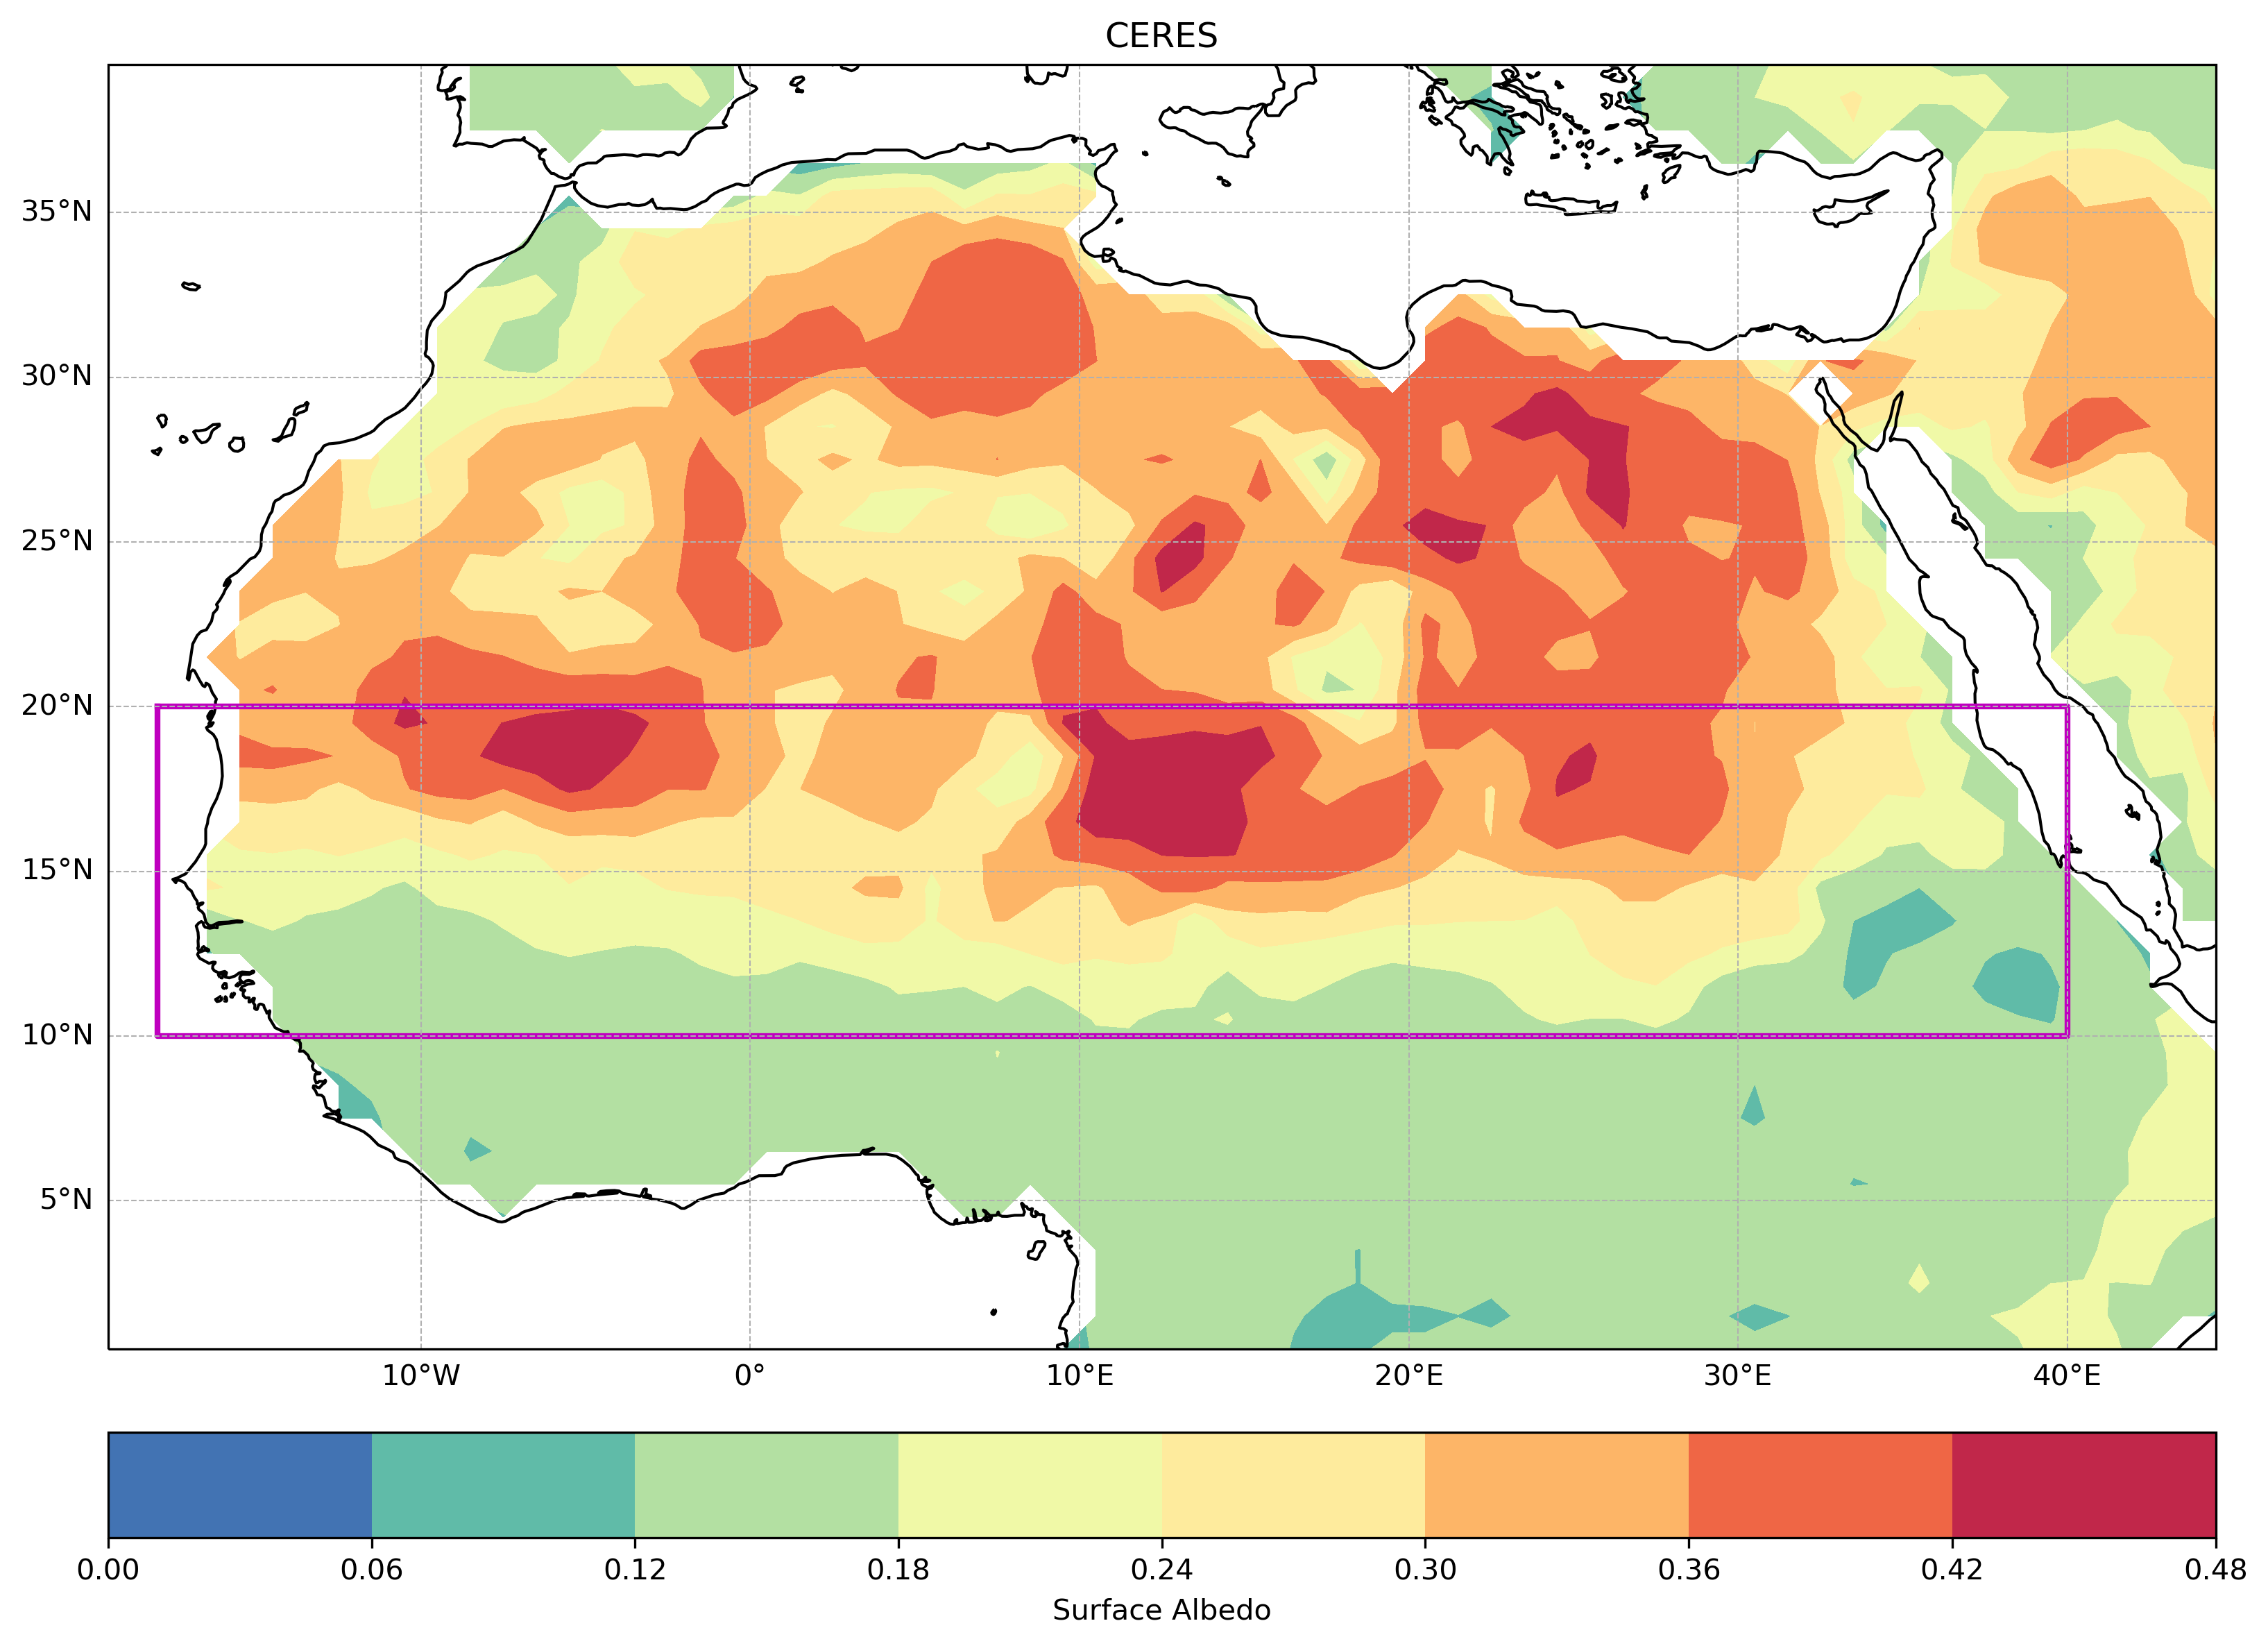

In [34]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

gls = axs.gridlines(draw_labels=True, ls='--', lw=0.5) #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
axs.coastlines()
cs = axs.contourf(cal.lon, cal.lat, cal, transform=ccrs.PlateCarree(), cmap='Spectral_r')
axs.plot([-18, -18, 40, 40, -18], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.PlateCarree())

fig.colorbar(cs, orientation='horizontal', label='Surface Albedo', pad = 0.05) #specifies to put the colorbar in ax2
plt.title('CERES')
plt.tight_layout()
plt.show()

In [35]:
models = ['ACCESS-CM2', 'MIROC6'] 

/home/rakshith/anaconda3/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/rakshith/anaconda3/envs/myenv/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/tmp/ipykernel_14663/2969789921.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


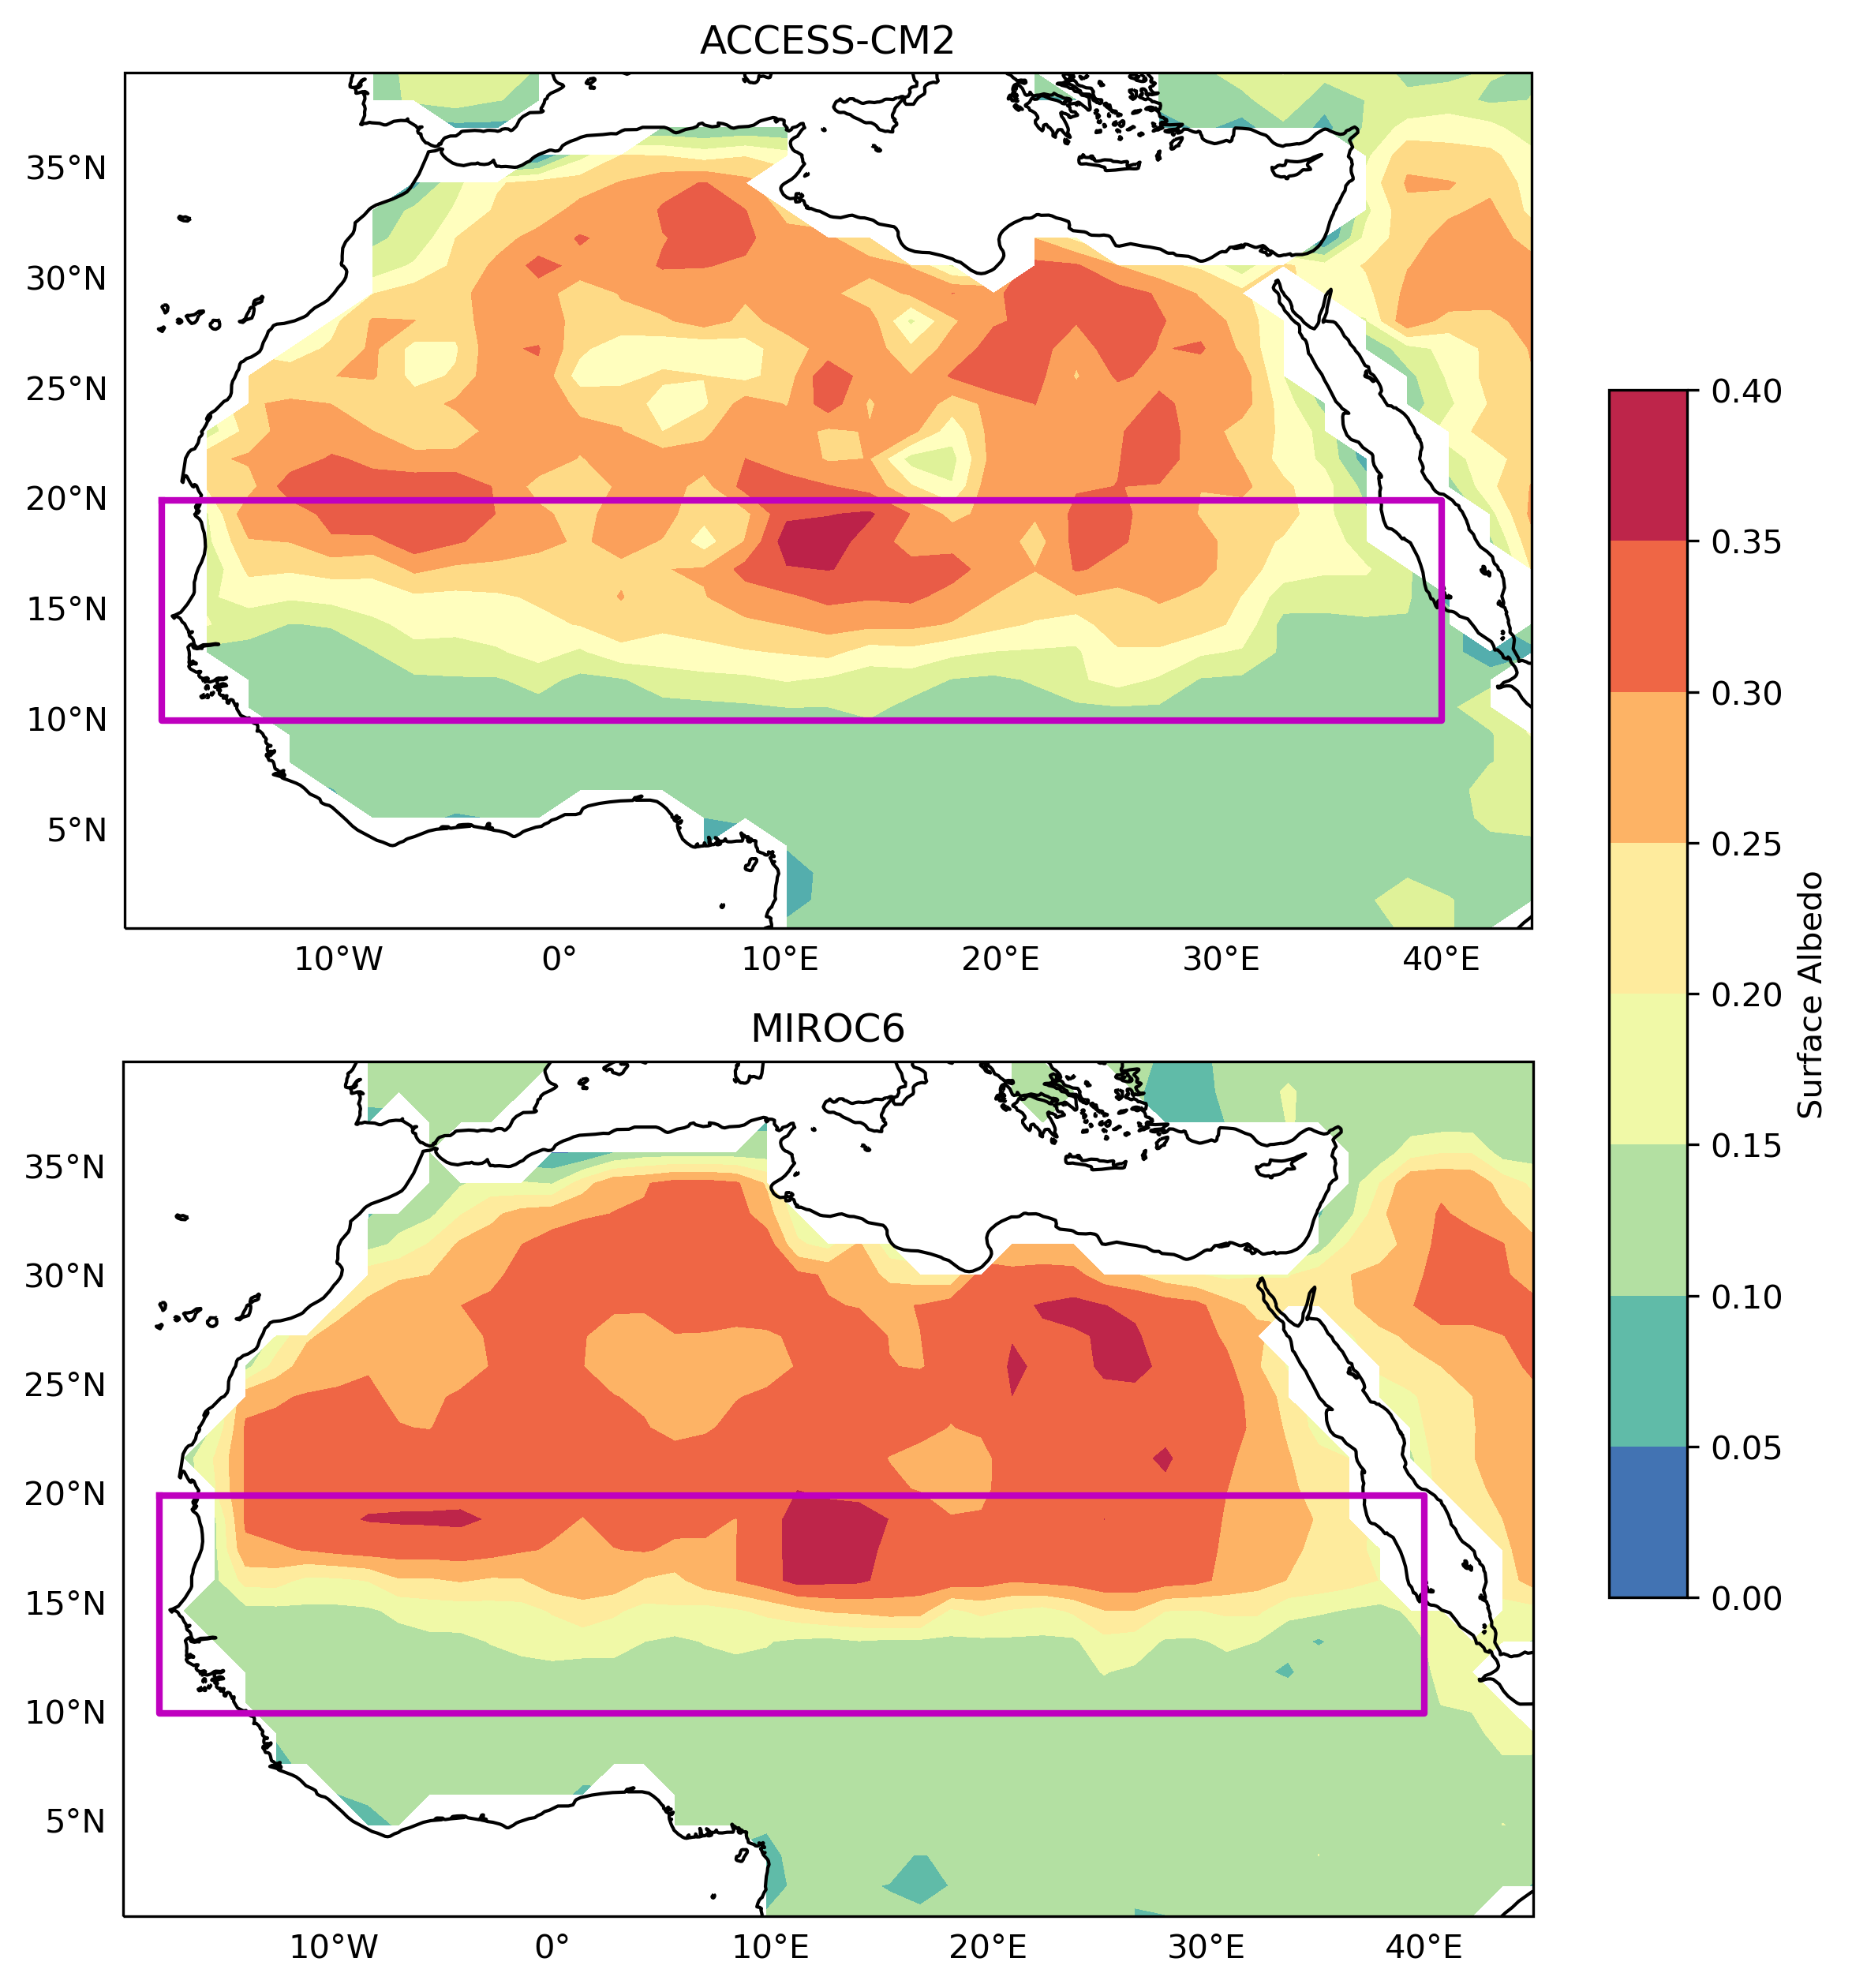

In [36]:
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

axs=axs.flatten()

for i in range(2):
    ds = xr.open_mfdataset(path+models[i]+file)
    ds.coords['lon'] = (ds.coords['lon']+180) % 360 -180
    ds2 = ds.sortby(ds.lon)
    ds3 = ds2.sel(time=slice('2000', '2014'), lat=slice(0,40), lon=slice(-20,45))
    
    lon_grid, lat_grid = np.meshgrid(ds3.lon, ds3.lat)
    mask = globe.is_land(lat_grid, lon_grid)
    
    jjas = ds3.time.dt.month.isin(range(6, 10))
    ds4 = ds3.sel(time=jjas)
    ds5 = ds4.mean('time')
    cal = np.divide(ds5.rsus.where(mask>0), ds5.rsds.where(mask>0))
    
    gls = axs[i].gridlines(draw_labels=True, color='none') #color='none' makes gridlines invisible
    gls.top_labels=False   # suppress top labels
    gls.right_labels=False # suppress right labels

    cs = axs[i].contourf(cal.lon, cal.lat, cal, transform=ccrs.PlateCarree(), cmap='Spectral_r', add_colorbar=False)
    axs[i].plot([-18, -18, 40, 40, -18], [20, 10, 10, 20, 20],'m',linewidth=2,transform=ccrs.PlateCarree()) #North Africa
    axs[i].set_title(models[i])
    axs[i].coastlines()

ax2 = fig.add_axes([0.80, 0.2, 0.03, 0.6]) #(padding, bottom, thickness, height)
fig.colorbar(cs, cax=ax2, label='Surface Albedo') #specifies to put the colorbar in ax2
plt.tight_layout()